# Project in scientific computing

## Part I

In [8]:
import numpy as np
import matplotlib.pyplot as plt

We will caklculate the height using maning Strickler method and use it later on

In [23]:
# Fix a set of parameters
b = 5
W = 10
d = 0.05
s = 2.65
g = 9.81
Ks = 34.6
S0 = 0.06
Q  = [0.1, 0.3, 1, 3, 5, 10, 15, 20, 25, 30]
Qs = np.zeros(len(Q))

def Maning_Strickler(Q, b, Ks, S0):
    
    """ Function to calcutate the height of the water using maning Strickler (return h)
     Parameters:
                                    Q = A.V with V =Ks.Rh^(2/3).S0^(0.5)  
                                    Rh: hydraulic radius = A (Area)/P(Perimeter)
                                    S0: slope
                                    Ks: depend on the material
                                    V : velocity
                                    A : Area = b(width)*h(height)
                                    Q :Flow rate
                                    Q = A.Ks.Rh^(2/3).S0^(0.5) 
                                      = A.Ks.(A^(2/3)/P^(2/3)).S0^(0.5)= Ks.A^(5/3).S0^(0.5)/P^2/3
                                      = b^(5/3)*h^(5/3).Ks.sqrt(S0)/(2h+b)^(2/3)
                                    h = [(Q.[2h+b]^(2/3))/(Ks.sqrt(S0).b^(5/3))]^(5/3)
                                    It is solved by iteration

    Preliminary computations:"""    
    h0 = 0
    h = np.zeros(len(Q))
    for i in range(0,len(Q)):
        h[i]= ((Q[i]*(2*h0+b)**(2/3))/(Ks*np.sqrt(S0)*b**(5/3)))**(3/5)
        while (h[i]-h0) > 0.001:
            h0 = h[i]
            h[i]= ((Q[i]*(2*h0+b)**(2/3))/(Ks*np.sqrt(S0)*b**(5/3)))**(3/5)
    return h

We will use this method to calculate to needed in other methods

In [36]:
def Calculating_to(b,d):
    
    """ Ro : mass volumetric of water
     Ros: mass volumetric of the sediments
     cf : depend on h/d
     f  : Darcy-Weisbach coef
     to : Shear """
    
    h   = np.zeros(len(Q))
    Rh  = np.zeros(len(Q))
    a   = np.zeros(len(Q))
    r   = np.zeros(len(Q))
    f   = np.zeros(len(Q))
    cf  = np.zeros(len(Q))
    v   = np.zeros(len(Q))
    to  = np.zeros(len(Q))
    
    h   = Maning_Strickler(Q, b, Ks, S0)
    Ro  = 1000
    Ros = 2650
    
    a0  = 0.223*S0**(-0.76)
    a1  = 0.52*S0**(-0.76)
    
    for i in range (0,len(Q)):
        Rh[i] = (b*h[i])/(b+h[i])
        a[i]  = Rh[i]/d
        if a[i] < a0 : 
            r[i] = 2.5 + 9.5*(np.log(a[i]))
        elif a[i] > a1 :
            r[i] = -1 + 9.5*(np.log(a[i]))
        else :
            r[i] = -3.7 -7.18*(np.log(S0)) 
        f[i]   = 8/(r[i])**2
        cf[i]  = f[i]/8
        v[i]   = r[i]*(g*Rh[i]*S0)**0.5
        to[i]  = (Ro*cf[i]*v[i]**2)/((Ros-Ro)*g*d)
    return to

Qs1 is equal to:  [0.02354232 0.01936632 0.00475032 0.03700968 0.07876968 0.18316968
 0.28756968 0.39196968 0.49636968 0.60076968]


Text(0, 0.5, 'QS')

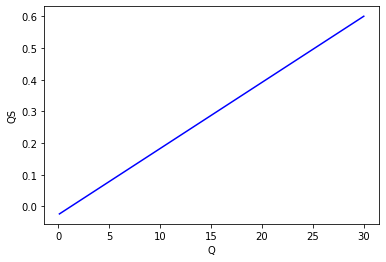

In [37]:
def Rickenmann(Q,W):
    
    """ qs: Water discharge per unit width
        W : Water width
        qcr: the critical water discharge
        d: Uniform grain size """
    
    q   = np.zeros(len(Q))
    qs  = np.zeros(len(Q))
    Qs1  = np.zeros(len(Q))
    qcr = 0.47*((d)**1.5)*(S0**(-1.12))
    for i in range(0,len(Q)):
        q[i] = Q[i]/W
        qs[i] = q[i]*(5.8*(S0**2))*(1-(qcr/q[i]))
        Qs1[i] = qs[i]*W
    print("Qs1 is equal to: ",abs(Qs1))
    return Qs1

f1 = Rickenmann(Q,W)
plt.figure()
plt.plot(Q, f1,'b')
plt.xlabel("Q")
plt.ylabel("QS")

Qs2 is equal to:  [0.00945547 0.00244857 0.00796525 0.05491982 0.10425758 0.22522095
 0.34154523 0.45370326 0.5622362  0.6676828 ]


Text(0, 0.5, 'QS')

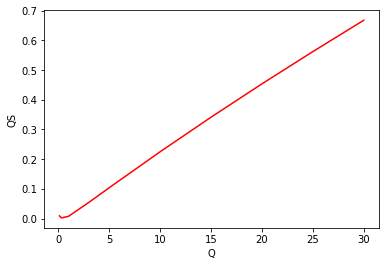

In [38]:
def MPM_Strickler(Q,W,S0,s,d,g):
    
    """ taw: Shear
          s : mass volumetric of water over the mass volumetric of sediment transport
         phi: Einstein parameter
         Rh : hydraulic radius
          g : gravity """
        
    Q  = [0.1, 0.3, 1, 3, 5, 10, 15, 20, 25, 30]
    h    = np.zeros(len(Q))
    Rh   = np.zeros(len(Q))
    taw  = np.zeros(len(Q))
    phi  = np.zeros(len(Q))
    qs   = np.zeros(len(Q))
    Qs2  = np.zeros(len(Q))
    
    h    = Maning_Strickler(Q, b, Ks, S0)
    
    for i in range(0, len(Q)):
        Rh[i]  = (b*h[i])/(b+h[i])
        taw[i] = (Rh[i]*S0)/((s-1)*d)
        phi[i] = 4*abs(taw[i]-0.0495)**(3/2)
        qs[i]  = phi[i]*((s-1)*g*(d**3))**0.5
        Qs2[i] = qs[i]*W
    print("Qs2 is equal to: ", Qs2)
    return Qs2

f2 = MPM_Strickler(Q,W,S0,s,d,g)
plt.figure()
plt.plot(Q,f2,'r')
plt.xlabel("Q")
plt.ylabel("QS")

Qs3 is equal to:  [0.00945547 0.00244857 0.00796525 0.05491982 0.10425758 0.22522095
 0.34154523 0.45370326 0.5622362  0.6676828 ]


Text(0, 0.5, 'QS')

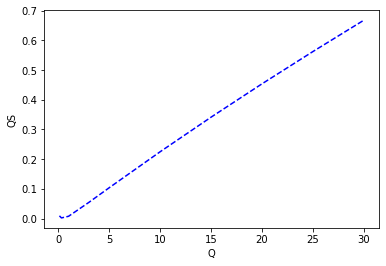

In [39]:
def MPM_With_Recking_friction_law(Q,W,S0,s,d,g):
    
    """ fi : Einstein parameter """
    
    fi1 = np.zeros(len(Q))
    qs  = np.zeros(len(Q))
    Qs3 = np.zeros(len(Q))
    
    to  = Calculating_to(b,d)
    
    for i in range (0,len(Q)):
        fi1[i] = 4*abs(to[i]-0.0495)**(3/2)
        qs[i]  = fi1[i]*((s-1)*g*d**3)**0.5
        Qs3[i] = qs[i]*W
    print("Qs3 is equal to: ",Qs3)
    
    return Qs3

f3 = MPM_With_Recking_friction_law(Q,W,S0,s,d,g)
plt.figure()
plt.plot(Q,f3,'b--')
plt.xlabel("Q")
plt.ylabel("QS")

Qs4 is equal to:  [1.74888804e-02 7.17503508e-03 3.70348013e-04 4.26624199e-02
 1.18672258e-01 3.28972648e-01 5.87571189e-01 8.83687618e-01
 1.20970979e+00 1.56088468e+00]


Text(0, 0.5, 'QS')

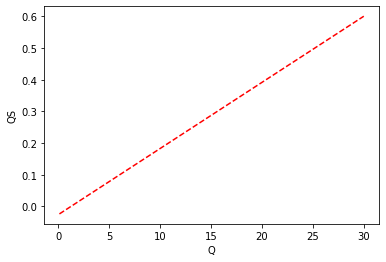

In [41]:
def Recking_bedload_formula(Q,W,S0,s,d,g):
    
    # tocr : The critical shields number
    # toc
    
    fi2   = np.zeros(len(Q))
    qs    = np.zeros(len(Q))
    Qs4   = np.zeros(len(Q))
    
    to    = Calculating_to(b,d)
    tocr  = 0.65*S0**0.41
    toc   = 0.15*S0**0.275
    
    for i in range (0,len(Q)):
        if to[i] < tocr:
            fi2[i]  = 15.6*(to[i]-toc)**2
        else: 
            fi2[i] = 14*(to[i])**2.45
        qs[i]  = fi2[i]*((s-1)*g*d**3)**0.5
        Qs4[i] = qs[i]*W 
    print("Qs4 is equal to: ", Qs4)
    return Qs4
f4 = Recking_bedload_formula(Q,W,S0,s,d,g)

plt.figure()
plt.plot(Q, f1,'r--')
plt.xlabel("Q")
plt.ylabel("QS")

Now it's time to draw all the graphs of Qs (The sediment rate) in function of the fluid rate (Q) for the different methods shown above in one plot

<Figure size 432x288 with 0 Axes>

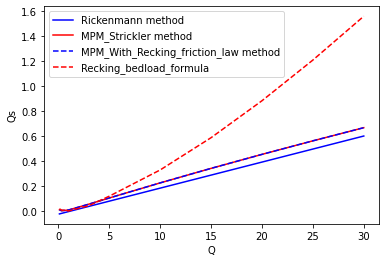

In [42]:
def Plot_Methods():
    plt.figure()
    fig, ax = plt.subplots()
    ax.plot(Q,f1,'b')
    ax.plot(Q,f2,'r')
    ax.plot(Q,f3,'b--')
    ax.plot(Q,f4,'r--')
    ax.set_xlabel('Q')
    ax.set_ylabel('Qs')
    ax.legend(['Rickenmann method', 'MPM_Strickler method' , 'MPM_With_Recking_friction_law method' , 'Recking_bedload_formula'])
    return None
f5 = Plot_Methods()

<div class="alert alert-block alert-info">
<b>Note:</b> From the calculations above we notice that the first three methods:
1) Rickenman 

2) MPM_Strickler

3) MPM_With_Recking_friction_law 

Gives near results unlike the last method:

4) Recking_bedload_formula 
</div>

So now let's draw a graph representing the error between these methods:
Here I'll show the difference between the MPM_Strickler and the other methods in absolute value

<Figure size 432x288 with 0 Axes>

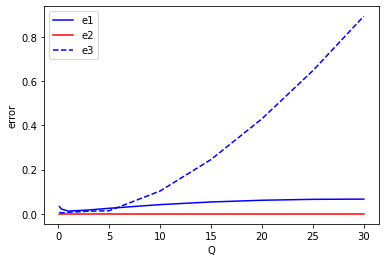

In [44]:
def Plot_errors():
    e1 = abs(f2-f1)
    e2 = abs(f2-f3)
    e3 = abs(f2-f4)
    plt.figure()
    fig, ax = plt.subplots()
    ax.plot(Q,e1,'b')
    ax.plot(Q,e2,'r')
    ax.plot(Q,e3,'b--')
    ax.set_xlabel('Q')
    ax.set_ylabel('error')
    ax.legend(['e1','e2', 'e3'])
    return None
f6 = Plot_errors()

<div class="alert alert-block alert-info">
<b>Note:</b> As we can see here the error is significant between all the methods and the Recking_bedload_formula 
and increase with the volume flow rate of the fluid Q
</div>

## Part II

**In this part of our study, our aim is to see if we have erosion, deposition or 
inerte part**

We have a bedload B6, B8 and Bf respectively. Let's have the following data:

At B6: S = 0.06, W = 25, $V_{av}$ = 10000 

At B7: S = 0.07, W = 20, $V_{av}$= 5000

At Bf: S = 0.06, W = 10, $V_{av}$ = Unlimited supply

Where S : the bedload slope 

W : The width in m 

Avs: The available sediment in $m^3$/s

A hydraulical study has given the following water peak discharge Q and V: 

10 years : $Q_{10}$ = 50 $m^3$/s , $v_{10}$ = $10^6$ $m^3$

100 years: $Q_{100}$ = 100 $m^3$/s,  $v_{100}$ = $2.10^6$ $m^3$ 


In [47]:
def equilibrium_transport_concentration():
    D   = 0.08
    S   = [0.06,0.07,0.06]
    W   = [25,20,10]
    Q   = [50,100]

    qcr = np.empty((len(Q),len(S)))
    q   = np.empty((len(Q),len(S)))
    c   = np.empty((len(Q),len(S)))
    for i in range(0,len(Q)):
        for j in range(0,len(S)):
            qcr[i,j] = 0.47*((D)**(1.5))*((S[j])**(-1.12))
            q[i,j]   = Q[i]/W[j]
            c[i,j]   = 5.8*(S[j]**2)*(1-qcr[i,j]/q[i,j])
    print('c = ', c,'\n','qcr = ', qcr,'\n', 'q = ', q)
    return c
f7 = equilibrium_transport_concentration()

c =  [[0.01828639 0.02604367 0.01984256]
 [0.0195832  0.02723183 0.02036128]] 
 qcr =  [[0.24842966 0.20903694 0.24842966]
 [0.24842966 0.20903694 0.24842966]] 
 q =  [[ 2.   2.5  5. ]
 [ 4.   5.  10. ]]


In [49]:
def effective_transportive_volume_out_of_reach():
    
    S = [0.06,0.07,0.06]
    V = [10**6,2*10**6]
    
    Vs = np.empty((len(V),len(S)))
    c  = np.empty((len(V),len(S)))
    
    for i in range(0,len(V)):
        for j in range(0,len(S)):
            if S[j] == 0.06:
                c[i,j] = 0.025
            else:
                c[i,j] = 0.035
            Vs[i,j] = c[i,j]*V[i]
    return Vs
f8 = effective_transportive_volume_out_of_reach()

In [50]:
def erosion_deposition():
    
    ''' VinB6 is the upstream sediment supply for both 10 and 100 years respectively
    Vav is the available sediments in the bed for B6, B7 and Bfan respectively (same for both years)
    Vtransport is the transported sediments
    Vtot = Vin + Vav - Vtrans
    In this part we will consider that State returns:
    0 => we have erosion
    1 => we have deposition
    2 => the bed is inerte
    Note that when Vtot is -1 as a return here means that there is no interest with Vtot '''

 
    VinB6  = [5000,60000]
    Vav    = [10000,5000,1000000]
    Vs = effective_transportive_volume_out_of_reach()
    Vin = np.empty((len(VinB6),len(Vav)))
    State  = np.empty((len(VinB6),len(Vav)))
    Vtrans = np.empty((len(VinB6),len(Vav)))
    Vtot = np.empty((len(VinB6),len(Vav)))
    Vin = np.empty((len(VinB6),len(Vav)))
   
    for i in range(0,len(VinB6)):
        for j in range(0,len(Vav)):
            Vin[0,0] = VinB6[0]
            Vin[1,0] = VinB6[1]
            if Vav[j] < 500000:                 #is not infiniti
                if Vin[i,j] != Vs[i,j]:
                    Vtot[i,j] = Vin[i,j]+Vav[j]-Vs[i,j]
                    if Vin[i,j] < Vs[i,j]:
                        Vtrans[i,j] = Vin[i,j]+Vav[j]
                        if Vtot[i,j] < 0:
                            State[i,j] = 0
                            if j <= len(Vav)-2:
                                Vin[i,j+1] = Vtrans[i,j]
                            else:
                                if i<len(VinB6)-2:
                                    Vin[i+1,0] = Vtrans[i,j]   
                        else:
                            State[i,j] = 1
                            if j <= len(Vav)-2:
                                Vin[i,j+1] = Vtrans[i,j]
                            else:
                                if i<len(VinB6)-2:
                                    Vin[i+1,0] = Vtrans[i,j]
                    else:
                        Vtrans[i,j] = Vs[i,j]
                        State[i,j] = 1
                        if j <= len(Vav)-2:
                            Vin[i,j+1] = Vtrans[i,j]
                        else:
                            if i<len(VinB6)-2:
                                Vin[i+1,0] = Vtrans[i,j]
                else:
                    Vtot[i,j] = -1
                    State[i,j] = 2
                    Vtrans[i,j] = Vs[i,j]
                    if j <= len(Vav)-2:
                        Vin[i,j+1] = Vtrans[i,j]
                    else:
                        if i<len(VinB6)-2:
                            Vin[i+1,0] = Vtrans[i,j]
                    
            else:
                Vtot[i,j] = -1
                Vtrans[i,j] = Vs[i,j] 
                if Vin[i,j]< Vs[i,j]:
                    State[i,j] = 0
                    if j <= len(Vav)-2:
                        Vin[i,j+1] = Vtrans[i,j]
                    else:
                        if i<len(VinB6)-2:
                            Vin[i+1,0] = Vtrans[i,j]
                elif Vin[i,j]> Vs[i,j]: 
                    State[i,j] = 1
                    if j <= len(Vav)-2:
                        Vin[i,j+1] = Vtrans[i,j]
                    else:
                        if i<len(VinB6)-2:
                            Vin[i+1,0] = Vtrans[i,j]
                else:
                    State[i,j] = 2
                    if j <= len(Vav)-2:
                        Vin[i,j+1] = Vtrans[i,j]
                    else:
                        if i<len(VinB6)-2:
                            Vin[i+1,0] = Vtrans[i,j]
    return State,Vin,Vtot,Vtrans            
f9 = erosion_deposition()

In this method I wanna draw Vin for each cases for B6, B8 and Bfan

<Figure size 432x288 with 0 Axes>

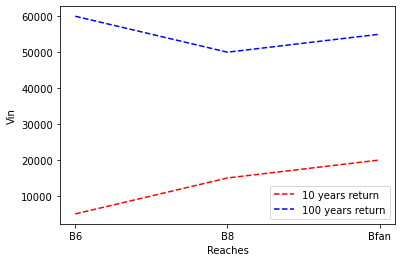

In [51]:
def Vin_Graph():
    
    State,Vin,Vtot,Vtrans = erosion_deposition()
    x = ["B6","B8","Bfan"]
    plt.figure()
    fig, ax = plt.subplots()
    ax.plot(x,Vin[0,:],'r--')
    ax.plot(x,Vin[1,:],'b--')
    ax.set_xlabel('Reaches')
    ax.set_ylabel('Vin')
    ax.legend(['10 years return','100 years return'])
    return None 

f10 = Vin_Graph()

In this last method we wanna draw in a graph the number of realisation of each state

count =  [4. 2. 0.]


<Figure size 432x288 with 0 Axes>

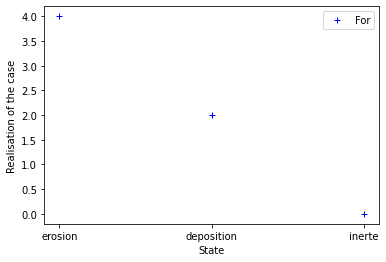

In [53]:
def State_Graph():
    
    ''' I will create a vector 'count' of 3 cases (this means that the vector have a size 3 and: 
    the first elememt is related to the erosion case,
    the second element is related to the deposition case,
    the third elemrnt is related to the inerte case) '''
     
    State,Vin,Vtot,Vtrans = erosion_deposition()
    count = np.zeros(3)
    x = ["erosion","deposition","inerte"]
    
    for i in range(0,len(State)):
        for j in range(0,len(State[0])):
            if State[i,j] == 0:
                count[0] += 1
            elif State[i,j] == 1:
                count[1] += 1
            else:
                count[2] += 1
    print ('count = ', count)
    plt.figure()
    fig, ax = plt.subplots()
    ax.plot(x,count,'b+')
    ax.set_xlabel('State')
    ax.set_ylabel('Realisation of the case')
    ax.legend(['For'])
    return None 
f11 = State_Graph()

<div class="alert alert-block alert-info">
<b>Coclusion:</b> 
As we can see from the figure above in our case there are:
4 cases of erosion
2 cases of deposition
0 cases of inerte bedload
</div>